<a href="https://colab.research.google.com/github/hhchin1995/plastic-quality-clustering/blob/main/Parallel_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import io

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
uploaded = files.upload()

# dataset = pd.read_csv('Plastic_PET_All_2.csv')
dataset = pd.read_csv('Plastic_PE_All_3.csv')
# dataset = pd.read_csv('Plastic_PP_All_2.csv')





# Importing the dataset

X_c = dataset.iloc[0:300, 2:23].values
# Supply=dataset.iloc[300:303,2:23].values
# Demand=dataset.iloc[303:306,2:23].values
# Resources=dataset.iloc[306:310,0:].values
print(X_c.shape)

columns=dataset.columns[0:]
print(columns)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


X_c_a=sc.fit_transform(X_c)
X_c=X_c_a
# Supply=sc.transform(Supply)
# Demand=sc.transform(Demand)
# Resources=sc.transform(Resources)

from sklearn.decomposition import PCA

# pca = PCA(n_components = 10)    # PET
pca = PCA(n_components = 13)    # PE
# pca = PCA(n_components = 12) #PP
X_c= pca.fit_transform(X_c)

from sklearn.preprocessing import StandardScaler


# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters =6, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X_c)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_c, y_hc)

dataset=dataset.drop(['Type','Polymer','PET','PP','PE'],axis=1)
# dataset=dataset.drop(['Class','Polymer','PET','PP','PE'],axis=1)
dataset.rename({'Food residue':'Food'},axis=1,inplace=True)
dataset.rename({'Metals Concentrations-Al (ppm)':'Al'},axis=1,inplace=True)
# dataset.rename({'Intrinsic Viscosity (dL/g)':'IV'},axis=1,inplace=True)
dataset.rename({'Melt flow index (g/10 min0':'MFI'},axis=1,inplace=True)
dataset.rename({'Melt flow index':'MFI'},axis=1,inplace=True)
dataset.rename({'Tensile strength (Mpa)':'Tensile'},axis=1,inplace=True)
dataset=dataset[0:300]

ss = StandardScaler()
dataset = pd.DataFrame(dataset,columns = dataset.columns)
dataset['cluster']=y_hc
dataset['cluster']=dataset['cluster']+1

columns=dataset.columns[0:]
print(columns)

Saving Plastic_PE_All_3.csv to Plastic_PE_All_3.csv
(300, 21)
Index(['Type', 'Polymer', 'As', 'Cd', 'Co', 'Cr', 'Cu', 'Fe', 'Hg', 'Li', 'Mn',
       'Ni', 'Pb', 'Sb', 'Ti', 'Zn', 'Metals Concentrations-Al (ppm)',
       'Melt flow index (g/10 min0', 'Tensile strength (Mpa)', 'Paper',
       'Cardboard', 'Food residue', 'Others', 'PET', 'PP', 'PE'],
      dtype='object')
Index(['As', 'Cd', 'Co', 'Cr', 'Cu', 'Fe', 'Hg', 'Li', 'Mn', 'Ni', 'Pb', 'Sb',
       'Ti', 'Zn', 'Al', 'MFI', 'Tensile', 'Paper', 'Cardboard', 'Food',
       'Others', 'cluster'],
      dtype='object')


In [ ]:
# Principal Component Analysis (PCA)

# Importing the libraries




# Evaluation
# from matplotlib.colors import ListedColormap
# fig, axs = plt.subplots(X_c.shape[1],X_c.shape[1],sharex=True,sharey=True)
# for shape1 in range(0,X_c.shape[1]):
#   # axs[shape1, 0].set_ylabel(columns[shape1])
#   axs[shape1, 0].set_ylabel('PC'+str(shape1+1))
#   for shape2 in range(0,X_c.shape[1]):
#     if shape1==shape2 or shape1<shape2:
#         continue
#     else:
#         X1, X2= np.meshgrid(np.arange(start = X_c[:, shape1].min()-0.5, stop = X_c[:, shape1].max()+0.5, step = 0.05),
#                              np.arange(start = X_c[:, shape2].min()-0.5, stop = X_c[:, shape2].max()+0.5, step = 0.05))
#         GG=np.zeros((X1.ravel().shape[0],X_c.shape[1]))
#         GG[:,shape1]=X1.ravel().T
#         GG[:,shape2]=X2.ravel().T
#         # predict=knn.predict(GG)
#         # predict=predict.reshape(X1.shape)
#         axs[shape1, shape2].contourf(X1, X2, knn.predict(GG).reshape(X1.shape),
#                      alpha = 0.15, cmap = ListedColormap(('red', 'blue','green','magenta')))
#         axs[shape1,shape2].scatter(X_c[y_hc == 0, shape1], X_c[y_hc == 0, shape2], s=5, c = 'red', label = 'Cluster 1')
#         axs[shape1,shape2].scatter(X_c[y_hc == 1, shape1], X_c[y_hc == 1, shape2],s=5, c = 'blue', label = 'Cluster 2')
#         axs[shape1,shape2].scatter(X_c[y_hc == 2, shape1], X_c[y_hc == 2, shape2], s=5, c = 'green', label = 'Cluster 3')
#         axs[shape1, shape2].scatter(X_c[y_hc == 3, shape1], X_c[y_hc == 3, shape2], s=5, c='magenta', label='Cluster 4')
#         # axs[shape1, shape2].scatter(X_c[y_hc == 4, shape1], X_c[y_hc == 4, shape2], s=5, c='cyan', label='Cluster 5')
#         # axs[shape1, shape2].scatter(X_c[y_hc == 5, shape1], X_c[y_hc == 5, shape2], s=5, c='grey', label='Cluster 6')
#
#
#         # axs[shape1,shape2].scatter(Supply[y_supply == 0, shape1], Supply[y_supply == 0, shape2], s=5, c = 'cyan', label = 'Cluster 1')
#         # axs[shape1,shape2].scatter(Supply[y_supply == 1, shape1], Supply[y_supply == 1, shape2],s=5, c = 'cyan', label = 'Cluster 2')
#         #
#         # axs[shape1,shape2].scatter(Demand[y_demand == 0, shape1], Demand[y_demand == 0, shape2], s=5, c = 'brown', label = 'Cluster 1')
#         # axs[shape1,shape2].scatter(Demand[y_demand == 1, shape1], Demand[y_demand == 1, shape2],s=5, c = 'brown', label = 'Cluster 2')
#         #
#         # axs[shape1,shape2].scatter(Resources[y_resources == 0, shape1], Resources[y_resources == 0, shape2], s=5, c = 'black', label = 'Cluster 1')
#         # axs[shape1,shape2].scatter(Resources[y_resources == 1, shape1], Resources[y_resources == 1, shape2],s=5, c = 'black', label = 'Cluster 2')
#
#         # axs[X_c.shape[1]-1, shape2].set_xlabel(columns[shape2])
#         axs[X_c.shape[1] - 1, shape2].set_xlabel('PC'+str(shape2+1))
#         # X1=np.zeros(X_c.shape[1])
#         # X2 = np.zeros(X_c.shape[1])
#
# #
# plt.show()




# plt.figure()
# sns.pairplot(dataset, hue = 'cluster')
# plt.show()

from pandas.plotting import parallel_coordinates

# plt.figure(figsize=(15,10))
# parallel_coordinates(dataset, "cluster",color=['blue','red','green','yellow'])
# plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
# plt.xlabel('Features', fontsize=15)
# plt.ylabel('Features values', fontsize=15)
# plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
# plt.show()

import plotly
import plotly.express as px
# fig = px.parallel_coordinates(dataset, color="cluster",
#                               dimensions=dataset.columns,
#                               color_continuous_scale=px.colors.diverging.Tealrose, #
#                               color_continuous_midpoint=2)
# fig.show()

import plotly.graph_objects as go
df_ = dataset.copy()
df_=df_.iloc[0:200]

dimensions = list([
                    dict(range=(df_['As'].min(),df_['As'].max()),label='As', values=df_['As']),
                    dict(range=(df_['Cd'].min(),df_['Cd'].max()),label='Cd', values=df_['Cd']),
                    dict(range=(df_['Co'].min(), df_['Co'].max()),label='Co', values=df_['Co']),
                    dict(range=(df_['Cr'].min(), df_['Cr'].max()),label='Cr', values=df_['Cr']),
                    dict(range=(df_['Cu'].min(), df_['Cu'].max()),label='Cu', values=df_['Cu']),
                    dict(range=(df_['Fe'].min(), df_['Fe'].max()),label='Fe', values=df_['Fe']),
                    dict(range=(df_['Hg'].min(), df_['Hg'].max()),label='Hg', values=df_['Hg']),
                    dict(range=(df_['Li'].min(), df_['Li'].max()),label='Li', values=df_['Li']),
                    dict(range=(df_['Mn'].min(), df_['Mn'].max()),label='Mn', values=df_['Mn']),
                    dict(range=(df_['Ni'].min(), df_['Ni'].max()),label='Ni', values=df_['Ni']),
                    dict(range=(df_['Pb'].min(), df_['Pb'].max()),label='Pb', values=df_['Pb']),
                    dict(range=(df_['Sb'].min(), df_['Sb'].max()),label='Sb', values=df_['Sb']),
                    dict(range=(df_['Ti'].min(), df_['Ti'].max()),label='Ti', values=df_['Ti']),
                    dict(range=(df_['Zn'].min(), df_['Zn'].max()),label='Zn', values=df_['Zn']),
                    dict(range=(df_['Al'].min(), df_['Al'].max()),label='Al', values=df_['Al']),
                    dict(range=(df_['MFI'].min(), df_['MFI'].max()),label='MFI', values=df_['MFI']),
                    # dict(range=(df_['IV'].min(), df_['IV'].max()),label='IV', values=df_['IV']),
                    dict(range=(df_['Tensile'].min(), df_['Tensile'].max()),label='Tensile', values=df_['Tensile']),
                    dict(range=(df_['Paper'].min(), df_['Paper'].max()),label='Paper', values=df_['Paper']),
                    dict(range=(df_['Cardboard'].min(), df_['Cardboard'].max()),label='Cardboard', values=df_['Cardboard']),
                    dict(range=(df_['Food'].min(), df_['Food'].max()),label='Food', values=df_['Food']),
                    dict(range=(df_['Others'].min(), df_['Others'].max()),label='Others', values=df_['Others']),
                    dict(range=(df_['cluster'].min(), df_['cluster'].max()),label='Cluster', values=df_['cluster']),
                  ])
fig = go.Figure(data= go.Parcoords(line = dict(color = df_['cluster'], colorscale =px.colors.sequential.YlOrRd), dimensions = dimensions))

fig.show()
# Peach, Blugrn, ice/Teal,Aggrnyl,deep (PET),YlOrRd (PE)
# px.colors.diverging.Portland, px.colors.sequential.Sunset (PP)
                                              #  ('#000000','#556270', '#4ECDC4', '#C7F464')

['As', 'Cd', 'Co', 'Cr', 'Cu', 'Fe', 'Hg', 'Li', 'Mn', 'Ni', 'Pb', 'Sb', 'Ti', 'Zn', 'Al', 'MFI', 'Tensile', 'Paper', 'Cardboard', 'Food', 'Others']
[0.03, 1.31, 0.19, 3.35, 20.4, 73.5, 1.17, 0.2, 1.64, 1.07, 7.07, 1.33, 1030.0, 24.9, 80.8, 6.158396001, 28.58902336, 3.113324172, 4.228178235, 1.8563969269999998, 2.818417338]
21


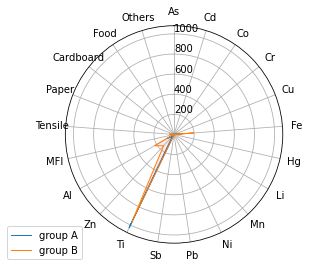

In [ ]:
from math import pi
from numpy.ma.core import default_fill_value
# Each attribute we'll plot in the radar chart.
labels = dataset.columns[:-1].tolist()
print(labels)

# Let's look at the 1970 Chevy Impala and plot it.
values = df_.iloc[0].tolist()
values=values[:-1]
print(values)
# Number of variables we're plotting.
N = len(labels)
print(N)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], labels)
 
# Draw ylabels
ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df_.iloc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df_.iloc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

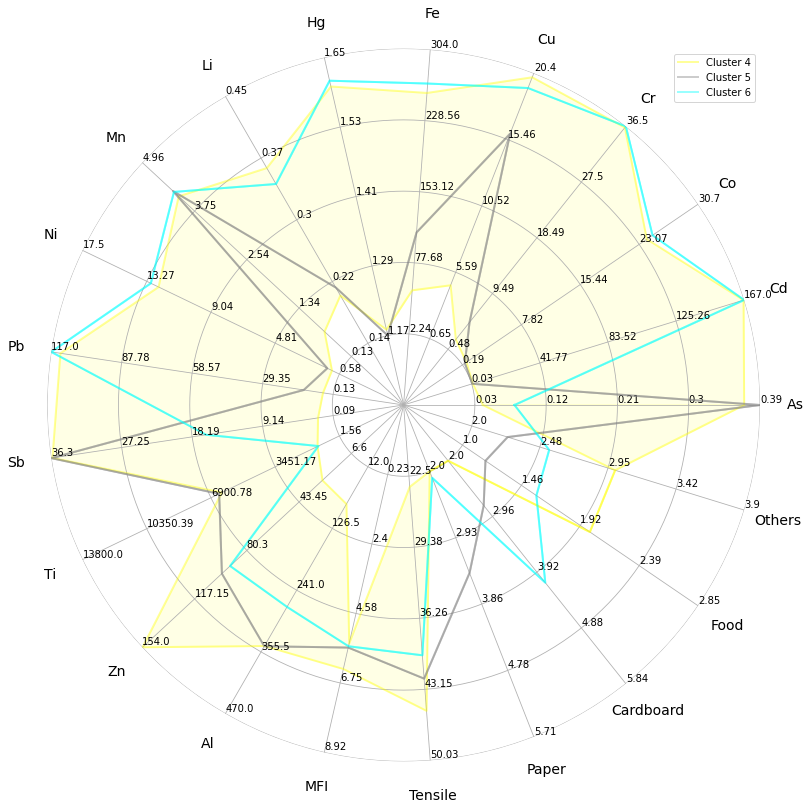

In [ ]:
class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.1, 0.1, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14)
        # (lines,labels)=self.ax.plot.thetagrids(self.angles, 
        #                   labels=title,
        #                   frac=1.2)
        self.ax.xaxis.set_tick_params(pad=25)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)
            

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 6), angle=angle, labels=label)
            ax.spines['polar'].set_visible(False)
            ax.set_ylim(0, 5)

    def plot(self, values,color_set,*args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values,color=color_set, *args, **kw)
        # self.ax.fill(angle, values,color=color_set,alpha=0.1)

    def fill_between(self, values1,values2,*args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values1 = np.r_[values1, values1[0]]
        values2 = np.r_[values2, values2[0]]
        self.ax.fill_between(angle,values1,values2,*args, **kw)

df_ = dataset.copy()
# df_=df_.drop(['cluster'],axis=1)
df_1=df_
df_1=df_1.drop(['cluster'],axis=1)

fig = plt.figure(figsize=(11, 11))

tit = dataset.columns[:-1].tolist()  

lab=[]
for i in df_.columns:
  if i != 'cluster':
    df_1[i]=round(df_1[i],2)
    lab.append(list(np.arange(df_1[i].min(),df_1[i].max(), (df_1[i].max()-df_1[i].min())/4))+[df_[i].max()])
  else:
    continue
# lab = [
#         list(np.arange(df_['As'].min(),df_['As'].max(), (df_['As'].max()-df_['As'].min())/4))+[df_['As'].max()]
#         # list('12345'),
#         # list('uvwxy'),
#         # ['one', 'two', 'three', 'four', 'five'],
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn'),
#         # list('jklmn')
# ]
for ii in range(0,len(lab)):
  for jj in range(0,len(lab[ii])):
    lab[ii][jj]=round(lab[ii][jj],2)

# print(lab)
for i in df_1.columns:
  df_1[i]=1+(df_1[i]-df_1[i].min())/((df_1[i].max()-df_1[i].min())/4)

value1=[]
value2=[]
value_min_c = []
value_max_c = []
for clus in np.unique(df_['cluster']):
  value_min = []
  value_max = []
  value_i=[]
  for ele in range(0,df_1.shape[0]):
    if df_['cluster'].iloc[ele]==clus:
      value_ii=[]
      for i in df_1.columns:
        value_ii.append(df_1[i].iloc[ele])
      value_i.append(value_ii)

  for i in range(0, len(df_1.columns)):
      value_ig = []
      value_min_r=[]
      value_max_r=[]
      for j in range(0, len(value_i)):
        value_ig.append(value_i[j][i])
      value_min_r.append(min(value_ig))
      value_max_r.append(max(value_ig))
      value_min.extend(value_min_r)
      value_max.extend(value_max_r)
  value_min_c.append(value_min)
  value_max_c.append(value_max)





color=['b','r','g','yellow','grey','cyan']

# print(df_.iloc[3])

# print(value_min_c)
# print(value_max_c)


radar = Radar(fig, tit, lab)
# radar.plot([1, 3, 2.5, 1, 3, 1, 1, 1, 1, 2, 3, 1,1,1,1,1,1,1,1,1,3.5],'b', '-', lw=2, alpha=0.4, label='first')
# radar.plot([2, 2, 3, 3, 3, 2, 2, 2, 0, 2, 3, 2,1,1,1,1,1,1,1,1,3.5],'b', '-', lw=2, alpha=0.4, label='second')
# radar.fill_between([1, 3, 2.5, 1, 3, 1, 1, 1, 1, 2, 3, 1,1,1,1,1,1,1,1,1,3.5],[2, 2, 3, 3, 3, 2, 2, 2, 0, 2, 3, 2,1,1,1,1,1,1,1,1,3.5],color='b',alpha=0.1)
# radar.plot(df_1.iloc[0][:],'b', '-', lw=2, alpha=0.4, label='first')
# radar.plot(df_1.iloc[1][:],'b', '-', lw=2, alpha=0.4, label='second')
# radar.fill_between(df_1.iloc[0][:],df_1.iloc[1][:],color='b',alpha=0.1)
# radar.plot([3, 4, 3, 1, 2, 2, 4, 3, 1, 2, 3, 3], '-', lw=2, color='g', alpha=0.4, label='third')
for i in range(3,len(value_min_c)):
  values1=value_min_c[i]
  values2=value_max_c[i]
  radar.plot(values1,color[i], '-', lw=2, alpha=0.4, label='Cluster '+str(i+1))
  radar.plot(values2,color[i], '-', lw=2, alpha=0.4)
  radar.fill_between(values1,values2,color=color[i],alpha=0.1)
radar.ax.legend()



In [ ]:
print(df_1['As'].iloc[11])
print(df_1.shape)

1.4444444444444446
(300, 21)
